In [6]:
def naive_momentum_trading(financial_data, nb_conseq_days):
    signals = pd.DataFrame(index=financial_data.index)
    signals['orders'] = 0
    cons_day=0
    prior_price=0
    init=True
    for k in range(len(financial_data['Close'])):
        price=financial_data['Close'][k]
        if init:
            prior_price=price
            init=False
        elif price>prior_price:
            if cons_day<0:
                cons_day=0
            cons_day+=1
        elif price<prior_price:
            if cons_day>0:
                cons_day=0
            cons_day-=1
        if cons_day==nb_conseq_days:
            signals['orders'][k]=1
        elif cons_day == -nb_conseq_days:
            signals['orders'][k]=-1
    return signals

We count the number of times a price is improved.
If the number is equal to a given threshold, we buy, assuming the price will keep
rising.
We will sell if we assume that the price will keep going down.

In [12]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import math as math


In [29]:
sbi =  yf.Ticker(str('SBIN')+'.NS').history(period="10y")
ts=naive_momentum_trading(sbi, 100)

In [30]:
ts

,orders
Date,
2014-05-30,0
2014-06-02,0
2014-06-03,0
2014-06-04,0
2014-06-05,0
...,...
2024-05-24,0
2024-05-27,0
2024-05-28,0


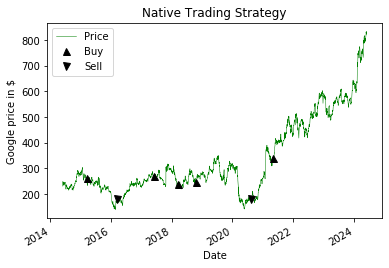

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
sbi["Close"].plot(ax=ax1, color='g', lw=.5)
ax1.plot(ts.loc[ts.orders== 1.0].index,
sbi["Close"][ts.orders == 1],'^', markersize=7, color='k')
ax1.plot(ts.loc[ts.orders== -1.0].index,
sbi["Close"][ts.orders == -1],'v', markersize=7, color='k')
plt.legend(["Price","Buy","Sell"])
plt.title("Native Trading Strategy")
plt.show()
